# Intro

The goal of this notebook is to introduce and code all the basic elements of a dense neural network, without using existing libraries such as keras or torch.

For the need of the narrative, the neural network object will not be defined as a class instance with build-in methods, but as a dictionary containing all the typical attributes needed for definition and training : layers properties, weights matrices, etc..

# Imports

In [1]:
import numpy as np 
#we need numpy for matrix manipulation, such as weights matrix, gradient, etc.

import seaborn as sns
#to display our results

That's it ! No need for more libraries, we'll rebuild all by ourselves !

# Our data

**What task will our neural network perfom ?**

 - classification on 2D inputs (2 features in our X : x1, x2)
 - binary classification : our y_true is a list of 0/1
 - just as in the [Tensorflow Playground](https://playground.tensorflow.org/)
 - we use the sklearn build-in dataset generator make_circles

[(-1.0, 1.0), (-1.0, 1.0), Text(0.5, 0, 'x1'), Text(0, 0.5, 'x2')]

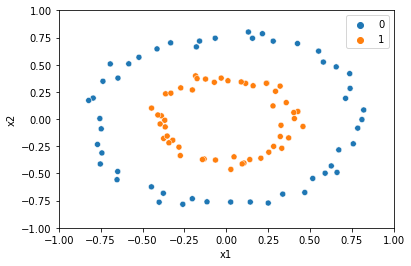

In [2]:
from sklearn.datasets import make_circles
X_circle, y_circle = make_circles(n_samples= 100, noise=0.05, factor=0.5, random_state=1)
X_circle *= 0.8
y_circle = np.expand_dims(y_circle,axis=1)
plot = sns.scatterplot(x= X_circle[:,0], y=X_circle[:,1],hue=y_circle[:,0])
plot.set(xlim=(-1,1), ylim=(-1,1),xlabel='x1',ylabel='x2')

# Creating the neural network

## Initialization

Let's create the minimal dictionary object containing basic default properties of our empty neural network.

Our network has no layers yet, so all layers variables are empty lists

In [26]:
my_handmade_nn = {'n_layers' : 0,
                  'layers_activation_types' : [],
                  'layers_weights' : [],
                  'layers_bias' : [],
                  'layers_input_dimensions' : [],
                 }

We need do define the dimension of the input of the model before creating the first layer, because the first weight matrix must be initialized with shape (n_neurons, input_dim)

Our data has 2 features : input_dim = 2

In [27]:
my_handmade_nn['layers_input_dimensions'].append(2)

## Creating the layers

When adding a new layer:
 - we need to know the dimension of the previous layer (or input), because the weight matrix is of shape (n_neurons, input_dim)
 - we initialize the weights and bias :
     - random values between 0 and 1 for the weights (if we initialize with the same value everywhere, the neurons will struggle to 'specialize' during the learning phase)
     - zeros for the bias


<details><summary>To go further : about initialization</summary>
The initialization of the weights and bias is of great importance, and is a subject of research by itself !

 - Initializing all params at zero ('zeros' is one of the initializers available in keras) is very suboptimal, because the neurons can't 'specialize' in different ways : thay are all the same ! It can lead to very slow learning, or the network can even stay stucked with no neurons specilized

 - Initializing with uniform random values (just like we did) is better for 'shuffling' the neurons, but still not optimal
    
 - Many advanced weights and bias initializers are available in keras API. 
    For exemple, the default one for weights is 'glorot_uniform', which looks like our random one, but instead of [0,1] boundaries, it uses a variable range, depending of the number of neurons in the layer)
</details>

In [28]:
def add_dense_layer (handmade_nn,
                     n_neurons,
                     activation_type):
    layer_input_dim = handmade_nn['layers_input_dimensions'][-1]

    # initializing the weight matrix of the layer, full of random values between 0 and 1
    # adding this matrix to the list
    handmade_nn['layers_weights'].append(np.random.uniform(size=(n_neurons, layer_input_dim)))
    
    # initializing the bias vector of the layer, full of values 0
    # adding this matrix to the list
    handmade_nn['layers_bias'].append(np.zeros(n_neurons))

    # adding the activation_type to the list
    handmade_nn['layers_activation_types'].append(activation_type)
    
    # adding the output dimension of the layer to the list, to be used by the next layer as input_dim
    handmade_nn['layers_input_dimensions'].append(n_neurons)
    
    #updating n_layers
    handmade_nn['n_layers'] +=1

Lets create 2 layers : one of 4 neurons, one of 3 neurons
We will use **tanh** activation

**Why ?**
By playing in the [Tensorflow Playground](https://playground.tensorflow.org/) you can see that this architecture performs very well on this classification task

In [29]:
add_dense_layer(my_handmade_nn, 4, 'tanh')
add_dense_layer(my_handmade_nn, 3, 'tanh')

Lets have a look at our neural network so far :

In [30]:
my_handmade_nn

{'n_layers': 2,
 'layers_activation_types': ['tanh', 'tanh'],
 'layers_weights': [array([[0.64190663, 0.30563283],
         [0.68605654, 0.7432351 ],
         [0.20559443, 0.9711654 ],
         [0.19803374, 0.04662191]]),
  array([[0.89067441, 0.07275532, 0.50046191, 0.05253325],
         [0.16066372, 0.97306909, 0.47094864, 0.66365102],
         [0.20429735, 0.53458126, 0.37474264, 0.29035044]])],
 'layers_bias': [array([0., 0., 0., 0.]), array([0., 0., 0.])],
 'layers_input_dimensions': [2, 4, 3]}

- The weights list contains a (4, 2) array and a (3, 4) array
- The bias list contains arrays with as many zeros as neurons
- The layers_input_dimensions is a little bit longer as it contains the last output dim, but it doesnt matter !

## The output 

Since we are trying to solve a binary classification task, a **single neuron** in the last layer with **sigmoid activation** will do the job, returning for each point a single value between 0 and 1: the probability of the point to be of class 1

In [31]:
add_dense_layer(my_handmade_nn, 1, 'sigmoid')
my_handmade_nn

{'n_layers': 3,
 'layers_activation_types': ['tanh', 'tanh', 'sigmoid'],
 'layers_weights': [array([[0.64190663, 0.30563283],
         [0.68605654, 0.7432351 ],
         [0.20559443, 0.9711654 ],
         [0.19803374, 0.04662191]]),
  array([[0.89067441, 0.07275532, 0.50046191, 0.05253325],
         [0.16066372, 0.97306909, 0.47094864, 0.66365102],
         [0.20429735, 0.53458126, 0.37474264, 0.29035044]]),
  array([[0.9347719 , 0.12748585, 0.77485454]])],
 'layers_bias': [array([0., 0., 0., 0.]), array([0., 0., 0.]), array([0.])],
 'layers_input_dimensions': [2, 4, 3, 1]}

That's it !
We have created the complete structure of the neural network

# Predicting and scoring

We will now implement the functions 
- transforming the input (X, in 2 dimensions) to the output (the probabilities) through the network from first to last layer
- evaluating the output : the loss function to compare the output probabilities with the actual 0/1 labels

## Predict

What does this function do ?
- takes the 2D-input point
- multiply by the first weight matrix to obtain a 4 values-long vector : one value per neuron on the first neuron
- add the bias vector of the layer : we obtain a 4-values-long vector, being the inputs of the activation function of the first layer
- compute the activation for each neuron : this 4-values-long vector is the input of the next layer

- and so on for each layer


Since we want to run this prediction on many samples at a time, all steps will be done on np arrays:
- the input will be an array of shape (n_samples, 2)
- the output of the first layer will be an array of shape (4, n_samples)
- etc..
- the output will have n_samples values of probabilities

In [9]:
def predict (handmade_nn, X):
    #transpose the input so it is of shape (input_dim n_samples) and ready to be multiplied by the first matrix 
    X = X.T
    for layer_index in range(handmade_nn['n_layers']):
        
        activation_type = handmade_nn['layers_activation_types'][layer_index]
        weights = handmade_nn['layers_weights'][layer_index]
        bias    = handmade_nn['layers_bias'][layer_index]
        
        #multiply input by the weight matrix, returning a (n_neurons, n_sample) array
        layer_input_dot_weights = np.dot(weights, X)
        
        #adding the bias to get the activation input
        activation_input = layer_input_dot_weights + np.expand_dims(bias, axis=1)
        
        # compute the activation, depending of the type
        if activation_type == 'tanh':
            X = np.tanh(activation_input)
        elif activation_type == 'sigmoid':
            X = 1/(1+np.exp(-activation_input))

    return X.T

Let's try it on our circle points !

In [10]:
y_pred = predict(my_handmade_nn, X_circle)
print('predivt output array shape : ',y_pred.shape)
y_pred[:10] # display the 10 first lines

predivt output array shape :  (100, 1)


array([[0.26749986],
       [0.27170871],
       [0.19037595],
       [0.25626202],
       [0.53501292],
       [0.62364349],
       [0.20529023],
       [0.26083595],
       [0.51063736],
       [0.63446589]])

Since the neural network is initialized with random weights, those are just random probabilities !

## Computing the loss

We need to compare our prediction with the actual y_true in order to train our model

In the case of a binary classification, the appropriate function is a binary_crossentropy, which is just a nice way of evaluating : **how far from 0 are probabilities predicted for the points supposed to be in the 0 class, and how far from 1 are the probabilities predicted for those supposed to be in the 1 class**.

Most importantly : this binary_crossentropy is **continuous and derivable** so we will be able to compute the **derivative** of this function, and so its **gradient** with respect to all the parameters of our model.
But for now, let's just define this function :
- taking 2 inputs:
    - a list (or np 1D array) of probabilities y_pred
    - a list of 0/1 actual classes y_true
- returning a single scalar value of the loss, the smaller the better

- its formula is : $$binary\_crossentropy = -\frac{1}{N} \sum \limits_{i=1}^{N} \Bigg[y_{true}log(y_{pred}) + (1 - y_{true})log(1 - y_{pred})\Bigg]$$

In [11]:
def compute_binary_crossentropy(y_true, y_pred):
    return -(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred)).mean() 
    #the formula of the crossentropy, with the first part 'y*np.log(y_pred)' standing for the class 1 points, 
    #                              and the second part '(1-y)*np.log(1-y_pred))' for those of class 0

Let's try it with our dummy prediction of the virgin neural network (not trained):

In [12]:
compute_binary_crossentropy(y_circle, y_pred)

0.8089284270893713

# The backpropagation

## How it works

The backpropagation is the method to compute the partial **derivative of our loss** with respect to all the parameters of our network : **weights and bias**.

For those not familiar with partial derivatives, this just means : **knowing the actual state of my neural network (the weights and bias values so far, AND the intermediate output values of each layer if we feed the network with some input X), WHAT IS THE INFLUENCE OF A TINY CHANGE OF EACH OF MY PARAMETERS (a weight or a bia)**

The trick of the backpropagation is to begin with the last layer:
- Given a batch of input data, we compute a prediction with the neural network, and we **keep track of the intermediate outputs of all layers** (we'll explain further why)
- First we compute the derivative of the loss itself, with respect to its direct input, i.e. the output of the last layer : $$\frac{\partial loss}{\partial last\_layer\_output} = \   \frac{\partial loss}{\partial y_{pred}}$$
&nbsp;

- Then we compute for each neuron of the last layer (in our case, just one) the derivative of the output with respect to the input of the activation function : $$\frac{\partial last\_layer\_output}{\partial last\_layer\_activation\_input} = \ \frac{d\  activation(x)}{dx}$$
&nbsp;

    - Note that this is just the derivative of the activation function. For exemple, if the layer is of type 'linear', this derivative is just 1!
    - For other activation types, we need to know the value inputing the function in order to evaluate its derivative. BUT by a happy coincidence, all the common activation functions (relu, tanh, sigmoid, softmax) have a derivative that can be expressed in term of the output. That is f'(x) = some_function(f(x)). This is lucky, because we know the output y_pred, while computing the input would require to use the ouput of the previous layer, multiply it by the weights matrix again, add the bias.
    - as a takeaway you can try to calculate these expressions for each activation type, but for the two we are using now, they are:
&nbsp;

$$\frac{d \ sigmoid}{dx} (x) = \  sigmoid(x) - \sqrt{sigmoid(x)}$$
&nbsp;
$$\frac{d \ tanh}{dx} (x) = \  - \sqrt{tanh(x)}$$
&nbsp;
- Remember our first goal is to compute the derivative of the loss with respect to the parameters of the last layer. 
    - So we can use this nice formula : 
    $$\frac{\partial loss}{\partial any\_param\_of\_last\_layer} = \frac{\partial loss}{\partial last\_layer_{output}} * \frac{\partial last\_layer_{output}}{\partial last\_layer_{activation\_input}} * \frac{\partial last\_layer_{activation\_input}}{\partial any\_param\_of\_last\_layer} $$
&nbsp;

    - Remember that the input of the activation function is **weights_matrix * previous_layer_output  + bias_vector**. 
    So $$\frac{\partial activation\_input}{\partial weights} = previous\_layer_{output}$$ 
    That's why we kept track of all intermediate outputs of the layers !
    - On the bias side, it is much simpler : $$\frac{\partial activation\_input}{\partial bias} = 1$$
    - We now have everything in hand to compute the derivative with respect to the last layer parameters, and we can re-formulate the big formula above.
    
For the weights:
    $$\frac{\partial loss}{\partial weights_{last\_layer}} = \frac{\partial loss}{\partial y_{pred}} * \frac{d\  activation}{dx}(activation\_input) * previous\_layer_{output}$$
&nbsp;

And for the bias:
    $$\frac{\partial loss}{\partial bias_{last\_layer}} = \frac{\partial loss}{\partial y_{pred}} * \frac{d\  activation}{dx}(activation\_input)$$
    
- Last move before moving backward : if we want to use the same approach for the penultimate layer, we will need $$\frac{\partial loss}{\partial penultimate\_layer_{output}}$$ (just like we used d loss / d last_layer_output before)

$$\frac{\partial loss}{\partial penultimate\_layer_{output}} = \frac{\partial loss}{\partial y_{pred}} * \frac{d\  activation}{dx}(activation\_input) * \frac{\partial activation\_input}{\partial penultimate\_layer_{output}}$$


 But we know that 
$$\frac{\partial activation\_input}{\partial penultimate\_layer_{output}} = weights\_matrix$$

 So :
$$\frac{\partial loss}{\partial penultimate\_layer_{output}} = \frac{\partial loss}{\partial y_{pred}} * \frac{d\  activation}{dx}(activation\_input) * weights\_matrix$$

    
- We are now ready to use the same process on the previous layer, and so on..

Now let's see how it looks in python !

## Loss derivative

The first function we need is the derivative of the loss :
- takes the same inputs as the loss : y_true, y_pred
- same output format
- the binary_crossentropy function is not difficult to derive, the formula is below

In [13]:
def compute_binary_crossentropy_derivative(y_true, y_pred):
    return -1 / y_true.size * (y_true / y_pred - (1-y_true) / (1-y_pred))

Let's try it on our model (not trained yet) and analyse the format of the output

In [14]:
loss_derivative = compute_binary_crossentropy_derivative(y_circle, y_pred)
print('shape of loss derivatives array : ', loss_derivative.shape)

shape of loss derivatives array :  (100, 1)


## Predict and keep all intermediate values

As explained above, we need to keep track of all intermediate layers outputs during the *predict* process, for further use by the backpropagation algorythm.

We just recode the previous predict method, with a new layers_output variable, aggregating the values, and returned at the end.

Note that we also include the X_input itself at the beginning of the list. This will be convenient for fit function, for a drier code

In [15]:
def predict_with_intermediate_values (handmade_nn, X):
    #initialize a list for the outputs:
    layers_outputs = [X]
    
    #transpose the input so it is of shape (input_dim n_samples) and ready to be multiplied by the first matrix 
    X = X.T
    
    for layer_index in range(handmade_nn['n_layers']):
        
        activation_type = handmade_nn['layers_activation_types'][layer_index]
        weights = handmade_nn['layers_weights'][layer_index]
        bias    = handmade_nn['layers_bias'][layer_index]
        
        #multiply input by the weight matrix, returning a (n_neurons, n_sample) array
        layer_input_dot_weights = np.dot(weights, X)
        
        #adding the bias to get the activation input
        activation_input = layer_input_dot_weights + np.expand_dims(bias, axis=1)
        
        # compute the activation, depending of the type
        if activation_type == 'tanh':
            X = np.tanh(activation_input)
        elif activation_type == 'sigmoid':
            X = 1/(1+np.exp(-activation_input))
        
        #adding the intermediate output to the list:
        layers_outputs.append(X.T)

    return layers_outputs

Let's try it on our model (not trained yet) and analyse the format of the output

In [16]:
intermediate_values = predict_with_intermediate_values(my_handmade_nn, X_circle)
print("intermediate values list length :", len(intermediate_values))
for i in range(len(intermediate_values)):
    print(f"shape of element n°{i+1}:", intermediate_values[i].shape)

intermediate values list length : 4
shape of element n°1: (100, 2)
shape of element n°2: (100, 4)
shape of element n°3: (100, 3)
shape of element n°4: (100, 1)


## Activation derivative

We need to compute the derivative of the activations function, for the backpropagation algorythm. 

As mentioned above, these derivatives are expressed in term of the output of the activation, rather that of the input, because this allows us to keep track only of the outputs of the layers.

The following function computes the derivatives for all the layers, using the intermediate values computed by the previous function predict_with_intermediate_values

In [17]:
def compute_activation_derivatives (handmade_nn, layer_outputs):
    
    activation_derivatives=[]
    
    for layer_index in range(handmade_nn['n_layers']):
        
        activation_type = handmade_nn['layers_activation_types'][layer_index]
        layer_output= layer_outputs[layer_index+1]
        
        if activation_type == 'sigmoid':
            activation_derivatives.append(layer_output - np.square(layer_output))
        if activation_type == 'tanh':
            activation_derivatives.append(1 - np.square(layer_output))
            
    return activation_derivatives

Lets test it and analyse the format of output

In [18]:
activation_derivatives = compute_activation_derivatives(my_handmade_nn, intermediate_values)
print("activation_derivatives list length :", len(activation_derivatives))
for i in range(len(activation_derivatives)):
    print(f"shape of element n°{i+1}:", activation_derivatives[i].shape)

activation_derivatives list length : 3
shape of element n°1: (100, 4)
shape of element n°2: (100, 3)
shape of element n°3: (100, 1)


## Backpropagation

Here it is ! 

The backpropagation algorythm returns the gradient with respect to weights and bias

In [19]:
def compute_backpropagation (handmade_nn, X, y_true):
        
        # we initialize the gradient (with respect to weights and bias) with empty lists
        gradient_weights=[]
        gradient_bias=[]
        
        # compute the outputs and the derivatives of each layer
        layers_outputs = predict_with_intermediate_values (handmade_nn, X)
        layers_activation_derivatives = compute_activation_derivatives (handmade_nn, layers_outputs)

        # compute d_loss/d_ypred and call it dloss_doutput, to be used by the last layer
        dloss_doutput = compute_binary_crossentropy_derivative(y_true, layers_outputs[-1])
        
        # now for each layer, from last to first, we process the 3 steps of backprop
        for layer_index in range(handmade_nn['n_layers']-1, -1, -1):
            
            # compute d_loss/d_activation_input of the layer
            dloss_d_activation_input = dloss_doutput * layers_activation_derivatives[layer_index]
            
            # compute gradient with respect to weights and bias
            gradient_weights.append(np.dot(dloss_d_activation_input.T, layers_outputs[layer_index]))
            gradient_bias.append(np.sum(dloss_d_activation_input, axis=0))
            
            # update dloss_doutput for next propagation
            if layer_index > 0:
                dloss_doutput = np.dot (dloss_d_activation_input,
                                        handmade_nn['layers_weights'][layer_index])
        
        gradient_weights.reverse()
        gradient_bias.reverse()
                
        return {'gradient_weights':gradient_weights, 'gradient_bias':gradient_bias}

Lets test it and analyse the format of output.
We compute the gradient for a mini batch of the 10 first lines of our X_circles

In [20]:
X_batch = X_circle [:10]
y_batch = y_circle [:10]
gradient = compute_backpropagation (my_handmade_nn, X_batch, y_batch)
gradient

{'gradient_weights': [array([[0.01373118, 0.04629661],
         [0.01458075, 0.0405026 ],
         [0.03076567, 0.07078371],
         [0.02233218, 0.06302474]]),
  array([[0.00376784, 0.003066  , 0.00550655, 0.00248211],
         [0.04328224, 0.03387735, 0.05772372, 0.03236839],
         [0.03235399, 0.02572369, 0.0446554 , 0.02313645]]),
  array([[0.17744927, 0.13663481, 0.16808726]])],
 'gradient_bias': [array([-0.17469395, -0.1566253 , -0.30318011, -0.24488924]),
  array([-0.01953032, -0.20369175, -0.16258986]),
  array([-0.32442676])]}

Lets check that the gradient has the same shape as the weights and bias arrays stored in our model.

In [21]:
my_handmade_nn

{'n_layers': 3,
 'layers_activation_types': ['tanh', 'tanh', 'sigmoid'],
 'layers_weights': [array([[0.70979716, 0.55553235],
         [0.42754253, 0.47768433],
         [0.37513172, 0.98730432],
         [0.90390163, 0.26470997]]),
  array([[0.91756823, 0.11555393, 0.9500002 , 0.95538591],
         [0.21489903, 0.40749039, 0.76342907, 0.74152883],
         [0.77188926, 0.46925352, 0.87888852, 0.57130424]]),
  array([[0.09812495, 0.79802885, 0.73040577]])],
 'layers_bias': [array([0., 0., 0., 0.]), array([0., 0., 0.]), array([0.])],
 'layers_input_dimensions': [2, 4, 3, 1]}

# Training

We have now all the functions we need to fit our model.
We will as optimizer a simple Gradient Descent by mini batch. This means:
- no momentum
- no regularization
- no adam, rmsprop, or other fancy algorythms

The pseudo-code is the following:
- for each epoch (n_epochs is an input):
 - for each mini-batch in the full set:
   - compute the gradient by back-propagation
   - update the weights, i.e. substract a share of the gradient (defined by the learning_rate coef)

<details><summary>To go further : about optimizers</summary>
The way we update the weights an bias can be much more complicated than just substracting a fixed share (learning_rate) of the gradient. For example, the learning rate can be 'dynamic' and decrease when the model approaches the optimum.
    
Each solution is called an optimizer, and finding new ones is actually an active field of research !

Here is an other example, just to get insight about how complicated it can be.
For neural networks, a popular one is adam, which pseudo-code looks like :
 - optimizer parameters :
     - alpha_init : initial value of learning rate
     - beta_1 : typically 0.9 : coef for update with 1st momentum
     - beta_2 : typically 0.999 : coef for update with 2nd momentum
     - epsilon : typically 10e-8 : kind of threshold used during params update
    
 - during initialization :
     - initialize a step counter : t=0
     - initialize alpha with the initial value : alpha_init
     - create 2 sets of empty matrices (filled with zeros), with same sizes as the weight and bias matrices : m_weights, m_bias_m, v_weights_v, v_bias

 - at each step :
     - increment the counter : $t=t+1$
     - decrease the alpha : $\alpha=\alpha_{init} \sqrt{\frac{1-\beta_2\cdot t}{1-\beta_1 \cdot t}}$
     - update each of the "m" matrices (w_weights and m_bias for each layer) with the a 'dose' of gradient (tuned by beta_1 coef) : $m=\beta_1 m + (1-\beta_1) \nabla$
     - update each of the "v" matrices with a 'dose' of squared gradient (tuned by beta_2 coef) : $v=\beta_2 v + (1-\beta_2) \nabla^2$
     - compute the update quantity for each weight and bias matrix, depending of the corresponding "m" and "v" matrix : $update = - \frac{\alpha \cdot m}{\sqrt{v} + \epsilon}$
        
     - substract this quantity from each weights and bias matrix
</details>

In [32]:
def fit(handmade_nn, X, y, loss='binary_crossentropy', 
        learning_rate=0.01, batch_size=10, n_epochs=100):
    
    #looping on the epochs
    for epoch_index in range(n_epochs):
        
        #looping on the mini-batches
        index=0
        while index < X.shape[0]:
            
            #computing the gradient
            gradient = compute_backpropagation (handmade_nn,
                                                X[index: index+batch_size],
                                                y[index: index+batch_size])
            
            #looping on the layers
            for layer in range(handmade_nn['n_layers']):
                
                #updating weights and bias
                handmade_nn['layers_weights'][layer] -= learning_rate * gradient['gradient_weights'][layer]
                
                handmade_nn['layers_bias'][layer] -= learning_rate * gradient['gradient_bias'][layer]
            
            #update the index where the next mini-batch begins
            index += batch_size
            

# Testing our neural network

Remember our goal : train a simple neural network to perform binary classification of points on a 2D plane, in order to separate the inner circle from the outer.

Lets:
- train our model during 1000 epochs
- evaluate the result (compute the loss)
- train again 1000 epochs
- score again

In [33]:
#score the model before the fit : display initial loss
y_pred_initial = predict (my_handmade_nn, X_circle)
print('initial loss : ', compute_binary_crossentropy(y_circle, y_pred_initial))

#fit the model
fit(my_handmade_nn, X_circle, y_circle, loss='binary_crossentropy', 
        learning_rate=0.01, batch_size=10, n_epochs=1000)

#score the model after the fit : display loss
y_pred_1000 = predict (my_handmade_nn, X_circle)
print('loss after 1000 epochs : ', compute_binary_crossentropy(y_circle, y_pred_1000))

#fit the model again
fit(my_handmade_nn, X_circle, y_circle, loss='binary_crossentropy', 
        learning_rate=0.01, batch_size=10, n_epochs=1000)

#score the model after the fit : display final loss
y_pred_final = predict (my_handmade_nn, X_circle)
print('final loss (2000 epochs) : ', compute_binary_crossentropy(y_circle, y_pred_final))

initial loss :  0.7581107903286289
loss after 1000 epochs :  0.40284515245133806
final loss (2000 epochs) :  0.027950514971411305


🎉 Our neural network has learned !

## Displaying the result

To vizualize it in 2D, lets create a grid on [-1,1] * [-1,1], on which we will make predictions of our model, generating a heatmap

In [34]:
def heatmap(handmade_nn):
    step = 0.01
    n_steps=int(2/step)
    grid = np.concatenate([np.array([(-1 +(i+.5)* step)*np.ones(n_steps),np.arange(-1+step/2,1,step)]).T for i in range(n_steps)],axis=0)
    heat_map = sns.heatmap(predict (my_handmade_nn, grid).reshape((n_steps,n_steps)),cmap='coolwarm')
    heat_map.set_xticks([0,100,200])
    heat_map.set_xticklabels([-1,0,1])
    heat_map.set_xlabel('x1')
    heat_map.set_yticks([0,100,200])
    heat_map.set_yticklabels([-1,0,1])
    heat_map.set_ylabel('x2')
    heat_map.scatter(x= (X_circle[:,0]+1)*100, y=(X_circle[:,1]+1)*100,c=y_circle,cmap='binary')

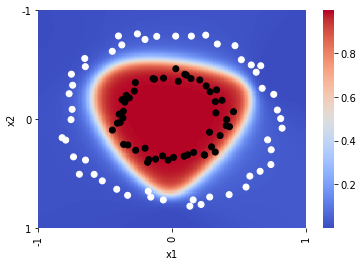

In [35]:
heatmap(my_handmade_nn)